# Data Cleansing and Preparation:
## The initial data cleansing and preparation steps were followed by the work in the source below:
### https://www.kaggle.com/code/okanulu/android-malware-prediction-with-ml-algorithms
## The choice to use only Android_SMS_Malware and Benign labels along with the  Random Forest Decision Tree model implementation, analysis, and evaluation are uniue to this notebook.t

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


In [4]:
data = pd.read_csv("../../../data/Android_Malware.csv")
print(data)
data = data.drop(' Timestamp', axis=1)

C:\Users\JansonLytle\AppData\Local\Temp\ipykernel_22348\4204408830.py:1: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../../../data/Android_Malware.csv")


        Unnamed: 0                                  Flow ID     Source IP  \
0                0    172.217.6.202-10.42.0.211-443-50004-6   10.42.0.211   
1                1    172.217.6.202-10.42.0.211-443-35455-6   10.42.0.211   
2                2    131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
3                3    131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
4                4    131.253.61.68-10.42.0.211-443-51776-6   10.42.0.211   
...            ...                                      ...           ...   
355625         405      172.217.7.14-10.42.0.211-80-38405-6  172.217.7.14   
355626         406         10.42.0.211-10.42.0.1-7632-53-17   10.42.0.211   
355627         407  10.42.0.211-104.192.110.245-45970-443-6   10.42.0.211   
355628         408        10.42.0.211-10.42.0.1-51982-53-17   10.42.0.211   
355629         409         10.42.0.211-10.42.0.1-9320-53-17   10.42.0.211   

         Source Port   Destination IP   Destination Port   Protocol  \
0   

In [5]:
print(data.columns.tolist())

['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', 

In [6]:
print(data['Label'].value_counts())
names=sorted(data['Label'].unique().tolist())
print(names)

Label
Android_Adware         147443
Android_Scareware      117082
Android_SMS_Malware     67397
Benign                  23708
Name: count, dtype: int64
['Android_Adware', 'Android_SMS_Malware', 'Android_Scareware', 'Benign']


In [7]:
print(data.dtypes)

Unnamed: 0           int64
Flow ID             object
 Source IP          object
 Source Port         int64
 Destination IP     object
                    ...   
Idle Mean          float64
 Idle Std          float64
 Idle Max          float64
 Idle Min          float64
Label               object
Length: 85, dtype: object


In [8]:
data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355625,405,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,80,10.42.0.211,38405.0,6.0,126711,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355626,406,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,7632,10.42.0.1,53.0,17.0,48012,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355627,407,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,45970,104.192.110.245,443.0,6.0,20028018,11,8,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,Benign
355628,408,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,51982,10.42.0.1,53.0,17.0,347926,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [9]:
print("Total Features : ",len(data.columns)-1)

Total Features :  84


# Data Preprocessing done unique to this notebook:

- Filtering the Dataset: The dataset is filtered to include only two labels—'Benign' and 'Android_SMS_Malware'—by dropping irrelevant categories ('Android_Adware' and 'Android_Scareware'). This ensures the model focuses on the most relevant classification task.

- Dropping Non-Numeric Columns: Non-numeric columns, such as 'Flow ID', 'Source IP', 'Destination IP', and others, are removed from the feature set. This is critical because machine learning models, including Random Forests, require numerical input data for training.

- Ensuring Numeric Data: After dropping non-numeric columns, the feature matrix (X) is checked to ensure only numeric columns remain. This step ensures that there are no data type issues when passing the data to the model.

- Label Encoding: The target variable (y) is mapped to integers—0 for 'Benign' and 1 for 'Android_SMS_Malware'. This allows the model to interpret the categorical labels as numeric values for classification.

## Step 1: Filter the dataset to include only 'Android_SMS_Malware' and 'Benign'

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.impute import SimpleImputer

filtered_data = data[data["Label"].isin(['Android_SMS_Malware', 'Benign'])]

In [11]:
filtered_data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
264525,0,10.42.0.151-40.69.219.199-35131-443-6,10.42.0.151,35131,40.69.219.199,443.0,6.0,12109,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
264526,1,10.42.0.151-40.69.219.199-35131-443-6,40.69.219.199,443,10.42.0.151,35131.0,6.0,43,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
264527,2,10.42.0.151-40.122.44.96-54930-443-6,10.42.0.151,54930,40.122.44.96,443.0,6.0,14678,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
264528,3,10.42.0.151-40.122.44.96-54930-443-6,40.122.44.96,443,10.42.0.151,54930.0,6.0,43,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
264529,4,10.42.0.151-52.179.153.195-53215-443-6,10.42.0.151,53215,52.179.153.195,443.0,6.0,3355709,11,7,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355625,405,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,80,10.42.0.211,38405.0,6.0,126711,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355626,406,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,7632,10.42.0.1,53.0,17.0,48012,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355627,407,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,45970,104.192.110.245,443.0,6.0,20028018,11,8,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,Benign
355628,408,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,51982,10.42.0.1,53.0,17.0,347926,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## Step 2: Drop non-numeric columns

In [12]:
X_filtered = filtered_data.drop(['Flow ID', ' Source IP', ' Destination IP', ' CWE Flag Count', ' Down/Up Ratio', 'Fwd Avg Bytes/Bulk', 'Label'], axis=1)

## Step 3: Ensure only numeric data remains

In [13]:
X_filtered_numeric = X_filtered.select_dtypes(include=[np.number])

## Verify that only numeric columns remain

In [14]:
print(X_filtered_numeric.dtypes)

Unnamed: 0             int64
 Source Port           int64
 Destination Port    float64
 Protocol            float64
 Flow Duration         int64
                      ...   
 Active Min          float64
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
Length: 78, dtype: object


## Step 4: Separate features (X) and target (y) after filtering

In [15]:
X = X_filtered_numeric
y = filtered_data["Label"]

## Step 5: Convert the target labels into numerical categories (Benign = 0, Android_SMS_Malware = 1)

In [16]:
y = y.map({'Benign': 0, 'Android_SMS_Malware': 1})

## Step 6: Check the data types of y to ensure it's numeric

In [17]:
print(y.dtypes)  # It should print "int64" or similar to indicate discrete values

int64


# Data Balancing: 
- Balancing Classes: Since class imbalance can negatively impact model performance, the balance_data function resamples the data to ensure both classes ('Benign' and 'Android_SMS_Malware') are equally represented. This step involves resampling the minority class (whichever has fewer samples) so that both classes have the same number of data points. After balancing, the data is shuffled to randomize the sample order.

- Ensuring Numeric Labels: The balanced target variable (y_balanced) is explicitly converted to integers. This step ensures that the model correctly interprets the labels as discrete classes during training and evaluation.

## Step 7: Balance the dataset using the balance_data function

In [33]:

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
import pandas as pd

def balance_and_scale_data(X, y, random_state=0, total_samples=20000):
    # Combine X and y into one DataFrame
    data = pd.concat([X, y], axis=1)
    
    # Count the occurrences of each class
    class_counts = y.value_counts()
    minority_class_count = class_counts.min()
    
    # Balance data by resampling each class to the size of the minority class
    balanced_data = pd.DataFrame(columns=data.columns)
    for label in class_counts.index:
        class_samples = data[data["Label"] == label]
        resampled_samples = resample(class_samples,
                                     replace=True,
                                     n_samples=minority_class_count,
                                     random_state=random_state)
        balanced_data = pd.concat([balanced_data, resampled_samples])
    
    # Shuffle the balanced dataset
    balanced_data = balanced_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # Now, limit the balanced dataset to a total of 20k samples
    final_data = balanced_data.sample(n=total_samples, random_state=random_state).reset_index(drop=True)
    
    # Separate features and labels
    X_balanced = final_data.drop("Label", axis=1)
    y_balanced = final_data["Label"]
    
    # Check for NaN values before imputation
    print("Number of NaN values in each column before imputation:")
    print(X_balanced.isna().sum())
    
    # Impute missing values using the mean strategy
    imputer = SimpleImputer(strategy='mean')
    X_balanced_imputed = imputer.fit_transform(X_balanced)
    
    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_balanced_imputed)
    
    return X_scaled, y_balanced


## Step 8: Balance the data

In [34]:
X_balanced, y_balanced = balance_and_scale_data(X, y)

Number of NaN values in each column before imputation:
Unnamed: 0           0
 Source Port         0
 Destination Port    0
 Protocol            0
 Flow Duration       0
                    ..
 Active Min          0
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
Length: 78, dtype: int64


## Step 9: Ensure y_balanced is correctly mapped to integers

In [35]:
y_balanced = y_balanced.astype(int)
print(y_balanced.dtypes)  

int32


## Step 10: Check for and remove missing values
- Checks for NaN (missing) values in each column of the original dataset (X_balanced) before handling missing values.
- Uses the SimpleImputer to impute (fill in) missing values in the dataset by replacing NaNs with the mean value of the respective column.
- Converts the imputed data (initially a NumPy array) back into a DataFrame to maintain compatibility with the rest of the code.
- Verifies that all NaN values have been successfully imputed by checking for any remaining NaNs in the cleaned dataset (X_balanced_clean).
- Ensures that the target variable (y_balanced) remains aligned with the cleaned feature dataset (X_balanced_clean).

# Cross-Validation and Classification Metrics Analysis
This code performs 10-fold cross-validation on a dataset using various configurations of Support Vector Classifier (SVC) models, evaluating their performance with accuracy, confusion matrix, and classification report.

## 1. SVC Configurations:
- Linear Kernel SVC: Assumes a linear boundary between classes in the feature space.
- RBF Kernel SVC: Uses the Radial Basis Function to capture non-linear boundaries between classes by mapping features into a higher-dimensional space.
- Polynomial Kernel SVC: Uses polynomial decision boundaries, allowing the model to capture more complex class relationships.

## 10-fold Cross-Validation: The `cross_val_predict` function is used to perform 10-fold cross-validation on the balanced dataset. In this process:
- The dataset is split into 10 equal subsets (folds).
- For each fold, the model is trained on 9 subsets and evaluated on the remaining subset.
- This process is repeated across all 10 folds, ensuring that every data point is used for both training and evaluation.
- Cross-validation helps mitigate overfitting by providing a robust evaluation of the model’s ability to generalize to unseen data.

## Evaluation Metrics:
- `cross_val_score`: This function is used to evaluate the accuracy of each fold, and the results are printed along with the average accuracy across all folds.
- Accuracy: The overall accuracy of the model based on the combined predictions from the cross-validation is calculated and reported.
- Confusion Matrix: A confusion matrix is generated to display how well the model predicts each class (e.g., 'Benign' vs. 'Android_SMS_Malware').
- Classification Report: A classification report provides detailed metrics such as precision, recall, F1-score, and support for each class, offering insights into how well the model distinguishes between 'Benign' and 'Android_SMS_Malware'.

## Conclusion:
By using balanced data and evaluating various SVC models with 10-fold cross-validation, this approach provides a comprehensive and reliable evaluation of each model's performance. The results help in identifying the most effective SVC configuration for classifying 'Benign' and 'Android_SMS_Malware' traffic, ensuring robust generalization on new data.

In [36]:
X_balanced

array([[-0.08534959,  0.65315707,  0.45826309, ..., -0.11989552,
        -0.30061128, -0.28260797],
       [-0.39124581,  0.18432412, -0.34220541, ..., -0.11989552,
        -0.30061128, -0.28260797],
       [ 0.22839014, -1.43684428, -0.36842383, ..., -0.11989552,
        -0.30061128, -0.28260797],
       ...,
       [-0.08647008, -0.05269425, -0.34220541, ..., -0.11989552,
         3.3502017 ,  3.64655163],
       [ 0.25640261,  0.22157221, -0.34220541, ..., -0.11989552,
         0.28079731,  0.34312859],
       [-0.57612815,  1.10752901, -0.34220541, ..., -0.11989552,
        -0.30061128, -0.28260797]])

In [37]:
y_balanced

0        1
1        0
2        1
3        0
4        1
        ..
19995    0
19996    0
19997    0
19998    1
19999    1
Name: Label, Length: 20000, dtype: int32

============================== SVC with linear kernel, C=1 Cross-Validation Evaluation ==============================

Accuracy for each fold: [0.758   0.77025 0.76525 0.76275 0.757  ]
Mean Accuracy across folds: 0.7627

Model Accuracy (combined prediction): 76.17%
Confusion Matrix:
 [[8767 1168]
 [3599 6466]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.88      0.79      9935
           1       0.85      0.64      0.73     10065

    accuracy                           0.76     20000
   macro avg       0.78      0.76      0.76     20000
weighted avg       0.78      0.76      0.76     20000




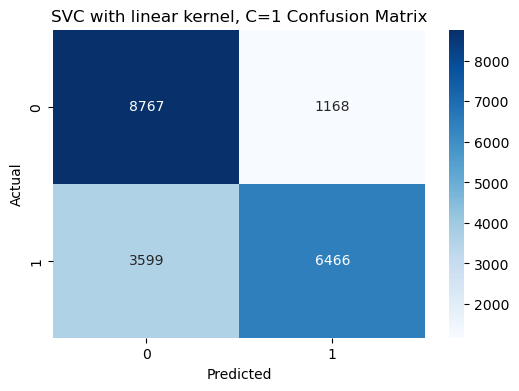

============================== SVC with RBF kernel, gamma=0.01, C=1 Cross-Validation Evaluation ==============================

Accuracy for each fold: [0.7655  0.78025 0.771   0.7675  0.764  ]
Mean Accuracy across folds: 0.7697

Model Accuracy (combined prediction): 77.18%
Confusion Matrix:
 [[8836 1099]
 [3465 6600]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79      9935
           1       0.86      0.66      0.74     10065

    accuracy                           0.77     20000
   macro avg       0.79      0.77      0.77     20000
weighted avg       0.79      0.77      0.77     20000




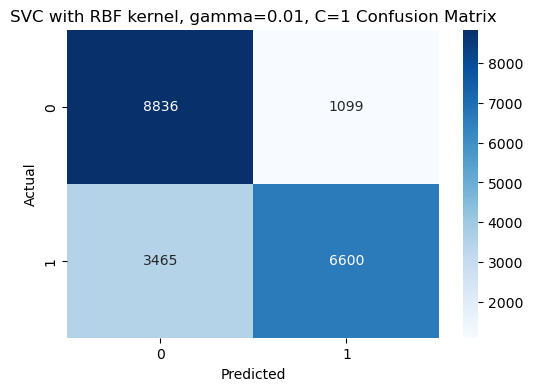

============================== SVC with polynomial kernel, degree=2, C=1 Cross-Validation Evaluation ==============================

Accuracy for each fold: [0.649   0.658   0.64325 0.63525 0.63925]
Mean Accuracy across folds: 0.6450

Model Accuracy (combined prediction): 64.61%
Confusion Matrix:
 [[7862 2073]
 [5006 5059]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.79      0.69      9935
           1       0.71      0.50      0.59     10065

    accuracy                           0.65     20000
   macro avg       0.66      0.65      0.64     20000
weighted avg       0.66      0.65      0.64     20000




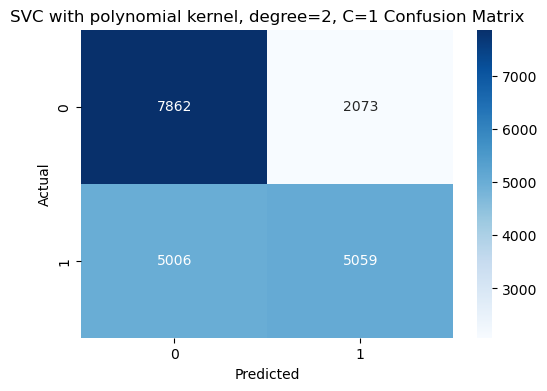

In [38]:
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define the SVC models with a wider range of hyperparameter values to experiment with performance
models = [
   ('SVC with linear kernel, C=1', SVC(kernel='linear', C=1, random_state=0)),
  # ('SVC with linear kernel, C=0.1', SVC(kernel='linear', C=0.1, random_state=0)),
   ('SVC with RBF kernel, gamma=0.01, C=1', SVC(kernel='rbf', C=1, gamma=0.01, random_state=0)),
   #('SVC with RBF kernel, gamma=0.1, C=0.1', SVC(kernel='rbf', C=0.1, gamma=0.1, random_state=0)),
   ('SVC with polynomial kernel, degree=2, C=1', SVC(kernel='poly', degree=2, C=1, random_state=0))
   #('SVC with polynomial kernel, degree=3, C=0.1', SVC(kernel='poly', degree=3, C=0.1, random_state=0))
]

# Function to evaluate the model using cross-validation
def evaluate_model_cv(model, X, y, model_name):
    # Get predictions using cross-validation
    y_pred = cross_val_predict(model, X, y, cv=10, n_jobs=-1)  
    
    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    
    # Generate confusion matrix
    confusion_matrix_result = confusion_matrix(y, y_pred)
    
    # Generate classification report
    classification = classification_report(y, y_pred)

    # Perform 5-fold cross-validation to get accuracy for each fold
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Print evaluation results
    print(f'============================== {model_name} Cross-Validation Evaluation ==============================\n')
    
    # Print accuracy for each fold and the mean accuracy
    print(f"Accuracy for each fold: {scores}")
    print(f"Mean Accuracy across folds: {np.mean(scores):.4f}\n")
    
    # Print overall evaluation using combined cross-validation predictions
    print(f'Model Accuracy (combined prediction): {accuracy * 100:.2f}%')
    print('Confusion Matrix:\n', confusion_matrix_result)
    print('Classification Report:\n', classification)
    print()

    # Plot confusion matrix (optional but helpful for visualization)
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Iterate through each SVC model and evaluate using cross-validation
for model_name, model in models:
    evaluate_model_cv(model, X_balanced, y_balanced, model_name)
